### Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.  

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.  

### Step 1: Data Loading and Preprocessing  

#### Task 1: Load the League of Legends dataset and preprocess it for training.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features.  

Please take responsibility for managing and installing all the required libraries for this lab on your own.

#### Exercise 1:  

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.  


In [1]:
import pandas as pd
import numpy as np
import torch

df = pd.read_csv('league_of_legends_data_large.csv')
df.head()


df_a = df[df['win'] == 1]  
df_b = df[df['win'] == 0]

df_a = df_a.sample(n=490, random_state=42)
df_b = df_b.sample(n=490, random_state=42)

lol_data = pd.concat([df_a, df_b])

print(lol_data['win'].value_counts())


win
1    490
0    490
Name: count, dtype: int64


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

X = lol_data.drop('win', axis=1)
y = lol_data['win']

display(X)
display(y)

,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
951,13,9,10,18519,288,0,1,9581
883,3,5,7,6837,195,14,5,29982
939,3,15,9,15701,224,1,9,35782
849,8,2,16,11111,152,0,1,46034
703,16,17,12,15674,150,7,4,43327
...,...,...,...,...,...,...,...,...
211,4,12,0,5887,272,18,0,20574
554,5,7,7,13143,75,12,7,20663
731,3,4,16,14961,289,4,6,30020
886,12,12,0,16141,171,7,2,43367


951    1
883    1
939    1
849    1
703    1
      ..
211    0
554    0
731    0
886    0
203    0
Name: win, Length: 980, dtype: int64

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

display(f'X_train shape: {X_train.shape}')
display(f'y_train shape: {y_train.shape}')
display(f'X_test shape: {X_test.shape}')
display(f'y_test shape: {y_test.shape}')

'X_train shape: (784, 8)'

'y_train shape: (784,)'

'X_test shape: (196, 8)'

'y_test shape: (196,)'

In [4]:
from torch.utils.data import DataLoader, TensorDataset

#Standarize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Conert to torch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)


### Step 2: Logistic Regression Model  

#### Task 2: Implement a logistic regression model using PyTorch.  

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.  

#### Exercise 2:  

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.  


In [5]:
## Write your code here

import torch.nn as nn

class ClassificationNet(nn.Module):
    def __init__(self, input_units=8, hidden_units=64, output_units=2):
        super(ClassificationNet, self).__init__()
        self.fc1 = nn.Linear(input_units, hidden_units)
        self.fc2 = nn.Linear(hidden_units, output_units)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = ClassificationNet(input_units=8, hidden_units=64, output_units=2)

print(model)

ClassificationNet(
  (fc1): Linear(in_features=8, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)


In [31]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-2.3484e-01,  3.4748e-01, -3.2113e-01, -1.2305e-01,  1.4403e+00,
                        6.2436e-01, -5.6896e-01, -8.6792e-01],
                      [-2.7924e-01,  2.7320e-01,  5.3220e-01, -2.3585e-01, -5.3234e-01,
                       -1.4043e-01, -4.6945e-01, -1.6577e+00],
                      [-4.2963e-03, -4.0386e-04,  3.5370e-03, -4.2044e-03, -4.9555e-04,
                        7.9795e-03, -2.8426e-03,  1.7874e-03],
                      [ 6.8505e-02,  1.0778e-01,  5.2125e-02, -3.2631e-03,  1.1458e-02,
                       -1.7250e-02, -7.1964e-02,  5.1702e-03],
                      [ 3.2246e-01,  4.5437e-02,  1.5741e-01,  4.6528e-01,  6.2364e-01,
                       -1.6985e-01,  1.2078e-01, -6.2823e-01],
                      [ 1.3254e-02, -1.5438e-02,  3.2413e-02, -1.1150e-02,  1.2209e-02,
                        1.0408e-02, -1.7766e-02,  1.3521e-02],
                      [ 1.4288e-03, -1.1746e-03,  5.5760e-04, -3.0

### Step 3: Model Training  

#### Task 3: Train the logistic regression model on the dataset.  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters .  

#### Exercise 3:  

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.  


In [6]:
# Write your code here

import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Evaluation phase on test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')


Epoch [1/10], Train Loss: 0.7010, Test Loss: 0.7120
Epoch [2/10], Train Loss: 0.6912, Test Loss: 0.7128
Epoch [3/10], Train Loss: 0.6868, Test Loss: 0.7177
Epoch [4/10], Train Loss: 0.6847, Test Loss: 0.7209
Epoch [5/10], Train Loss: 0.6799, Test Loss: 0.7228
Epoch [6/10], Train Loss: 0.6780, Test Loss: 0.7192
Epoch [7/10], Train Loss: 0.6726, Test Loss: 0.7310
Epoch [8/10], Train Loss: 0.6707, Test Loss: 0.7230
Epoch [9/10], Train Loss: 0.6669, Test Loss: 0.7358
Epoch [10/10], Train Loss: 0.6638, Test Loss: 0.7358


### Step 4: Model Optimization and Evaluation  

#### Task 4: Implement optimization techniques and evaluate the model's performance.  

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets.  

#### Exercise 4:  

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.  


In [18]:
## Write your code here

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay= 0.05)

epochs = 10
train_losses = []
test_losses = []

# Store predictions and true labels for the confusion matrix
all_preds = []
all_labels = []

for epoch in range(epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Evaluation phase on test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

            # Convert the outputs to predicted classes
            _, predicted_classes = torch.max(test_outputs, 1)  # Obtener la clase con la mayor probabilidad

            # Almacenar las predicciones y etiquetas reales
            if epoch == 9:
                all_preds.extend(predicted_classes.cpu().numpy())  # Guardar las predicciones
                all_labels.extend(y_batch.cpu().numpy())  # Guardar las etiquetas reales

    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch [1/10], Train Loss: 0.6918, Test Loss: 0.6934
Epoch [2/10], Train Loss: 0.6924, Test Loss: 0.6938
Epoch [3/10], Train Loss: 0.6917, Test Loss: 0.6934
Epoch [4/10], Train Loss: 0.6927, Test Loss: 0.6932
Epoch [5/10], Train Loss: 0.6926, Test Loss: 0.6933
Epoch [6/10], Train Loss: 0.6925, Test Loss: 0.6936
Epoch [7/10], Train Loss: 0.6924, Test Loss: 0.6929
Epoch [8/10], Train Loss: 0.6927, Test Loss: 0.6934
Epoch [9/10], Train Loss: 0.6925, Test Loss: 0.6940
Epoch [10/10], Train Loss: 0.6924, Test Loss: 0.6934


### Step 5: Visualization and Interpretation  

#### Task 5: Visualize the model's performance and interpret the results.  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.  

#### Exercise 5:  

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.  


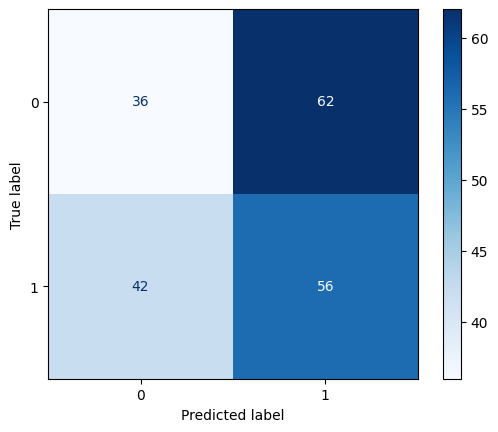

In [19]:
## Write your code here
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(all_labels, all_preds)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])  # Si son 2 clases
disp.plot(cmap="Blues")




In [20]:
report = classification_report(all_labels, all_preds, target_names=['Clase 0', 'Clase 1'])
print(report)

              precision    recall  f1-score   support

     Clase 0       0.46      0.37      0.41        98
     Clase 1       0.47      0.57      0.52        98

    accuracy                           0.47       196
   macro avg       0.47      0.47      0.46       196
weighted avg       0.47      0.47      0.46       196



### Step 6: Model Saving and Loading  

#### Task 6: Save and load the trained model.  

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

#### Exercise 6:  

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.  


In [24]:
## Write your code here
modelo_save = torch.save(model.state_dict(), 'model.pth')

# Cargar el modelo en el mismo tipo de arquitectura
model = ClassificationNet(input_units=8, hidden_units=64, output_units=2)  # Asegúrate de usar la misma arquitectura

# Cargar los pesos
model.load_state_dict(torch.load('model.pth'))

# Asegúrate de poner el modelo en modo de evaluación si vas a hacer inferencia
model.eval()

C:\Users\Genia\AppData\Local\Temp\ipykernel_27716\3795384876.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pth'))


ClassificationNet(
  (fc1): Linear(in_features=8, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

### Step 7: Hyperparameter Tuning  

#### Task 7: Perform hyperparameter tuning to find the best learning rate.  

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance .  

#### Exercise 7:  

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.  


In [27]:
## Write your code here

lr_list = [0.001, 0.01, 0.1, 0.2]

for lr in lr_list:

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay= 0.05)

    epochs = 10
    train_losses = []
    test_losses = []

    # Store predictions and true labels for the confusion matrix
    all_preds = []
    all_labels = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)
        
        # Evaluation phase on test set
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                test_outputs = model(X_batch)
                loss = criterion(test_outputs, y_batch)
                test_loss += loss.item()

                # Convert the outputs to predicted classes
                _, predicted_classes = torch.max(test_outputs, 1)  # Obtener la clase con la mayor probabilidad

                # Almacenar las predicciones y etiquetas reales
                if epoch == 9:
                    all_preds.extend(predicted_classes.cpu().numpy())  # Guardar las predicciones
                    all_labels.extend(y_batch.cpu().numpy())  # Guardar las etiquetas reales

        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        
        # print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

    print(f'Lr {lr}, loss_trainin {train_loss:.4f}  Test Loss: {test_loss:.4f}')



Lr 0.001, loss_trainin 0.6916  Test Loss: 0.6944
Lr 0.01, loss_trainin 0.6970  Test Loss: 0.6952
Lr 0.1, loss_trainin 0.9841  Test Loss: 0.9260
Lr 0.2, loss_trainin 1.9816  Test Loss: 2.2422


### Step 8: Feature Importance  

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.  

The code to evaluate feature importance to understand the impact of each feature on the prediction.  

#### Exercise 8:  

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.  


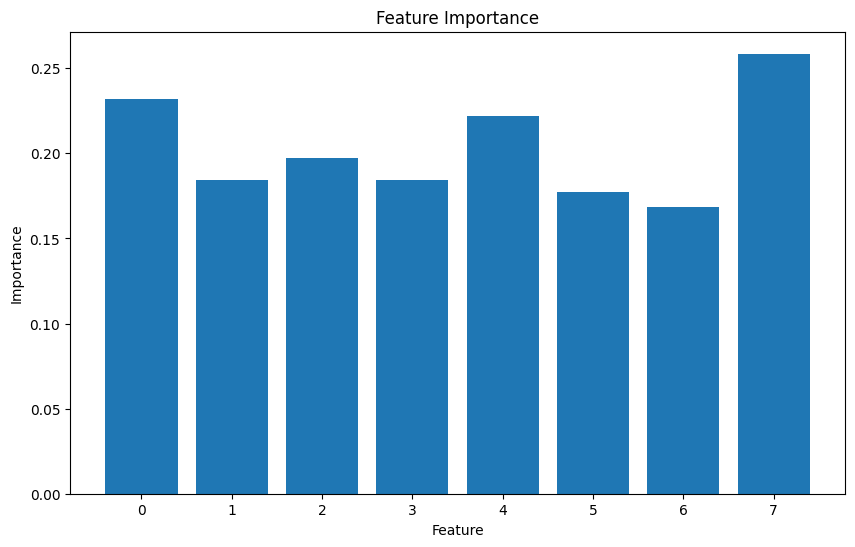

In [36]:
# prompt: Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.

import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances from the linear layer
weights = model.fc1.weight.detach().cpu().numpy()

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': range(weights.shape[1]), 'Importance': np.abs(weights).mean(axis=0)})

# Sort by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()